In [8]:
#  pandas datareader 설치
!pip install pandas_datareader

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data

# 그래프를 위한 기본 설정
# 폰트 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6
# 글자 크기
plt.rcParams['font.size'] = 14
# 폰트 설정시 마이너스 기호가 깨지는 것을 방지한다.
plt.rcParams['axes.unicode_minus'] = False

In [10]:
# 삼성전자 주가 데이터
# 종목코드는 yahoo finance 사이트에서 검색한다.
samsung = data.DataReader('005930.KS', 'yahoo', '2000-01-01', '2022-12-31')
samsung

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,6110.0,5660.0,6000.0,6110.0,74195000.0,4591.915527
2000-01-05,6060.0,5520.0,5800.0,5580.0,74680000.0,4193.599121
2000-01-06,5780.0,5580.0,5750.0,5620.0,54390000.0,4223.661133
2000-01-07,5670.0,5360.0,5560.0,5540.0,40305000.0,4163.538086
2000-01-10,5770.0,5580.0,5600.0,5770.0,46880000.0,4336.392578
...,...,...,...,...,...,...
2022-12-07,59600.0,58500.0,58800.0,58900.0,12100662.0,58900.000000
2022-12-08,59200.0,58600.0,58700.0,59200.0,12986815.0,59200.000000
2022-12-09,60600.0,59300.0,59300.0,60400.0,10529632.0,60400.000000


In [11]:
# 결측치 확인
samsung.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [12]:
# 거래량이 0인 날짜가 있는지 확인
samsung.query('Volume == 0')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,0.0,3855.405762
2000-03-01,5120.0,5120.0,5120.0,5120.0,0.0,3847.889648
2000-04-05,6800.0,6800.0,6800.0,6800.0,0.0,5110.478027
2000-04-13,6910.0,6910.0,6910.0,6910.0,0.0,5193.148926
2000-05-01,6000.0,6000.0,6000.0,6000.0,0.0,4509.247559
...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,0.0,70610.359375
2022-03-04,72900.0,72900.0,72900.0,72900.0,0.0,71592.437500
2022-03-10,69500.0,69500.0,69500.0,69500.0,0.0,68253.414062


In [14]:
# 거래량이 0인 날을 제거한다.
idx = samsung.query('Volume == 0').index
samsung.drop(idx, inplace=True)
samsung.query('Volume == 0')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,


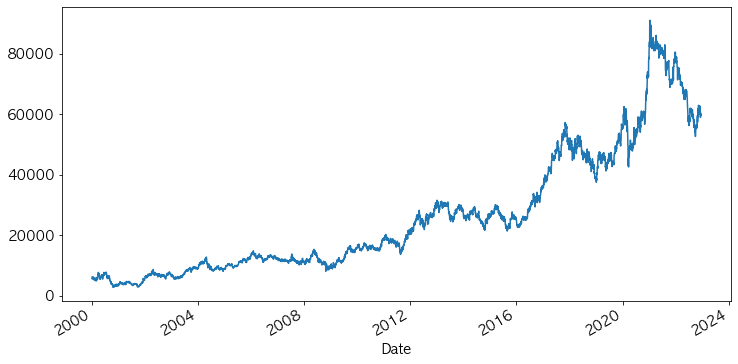

In [15]:
# 종가 시각화
samsung['Close'].plot()
plt.show()

In [16]:
# pct_change: 이전의 행보다 동락한 비율을 구해준다.
a1 = samsung['Close'].pct_change() * 100
a1

Date
2000-01-04         NaN
2000-01-05   -8.674304
2000-01-06    0.716846
2000-01-07   -1.423488
2000-01-10    4.151625
                ...   
2022-12-07   -0.506757
2022-12-08    0.509338
2022-12-09    2.027027
2022-12-12   -1.490066
2022-12-13    0.336134
Name: Close, Length: 5633, dtype: float64

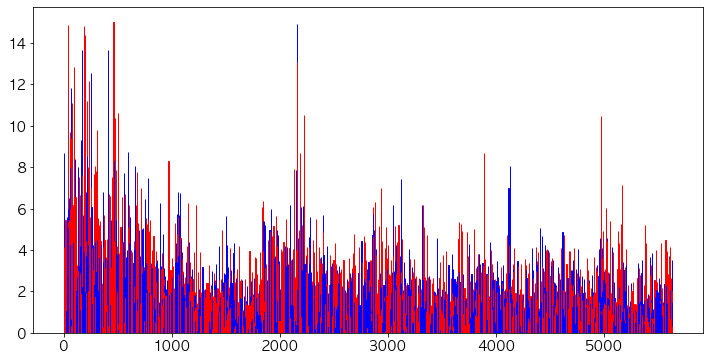

In [19]:
# 데이터의 계수만큼 0부터 1씩 증가된 값을 구한다.
x = range(len(a1))
bar_list = plt.bar(x, abs(a1.values))
# 색상 설정
for idx in x:
    if a1.values[idx] > 0:
        bar_list[idx].set_color('red')
    else:
        bar_list[idx].set_color('blue')

plt.show()

In [20]:
# 등락량
a1 = samsung['Close'].diff()
a1

Date
2000-01-04       NaN
2000-01-05    -530.0
2000-01-06      40.0
2000-01-07     -80.0
2000-01-10     230.0
               ...  
2022-12-07    -300.0
2022-12-08     300.0
2022-12-09    1200.0
2022-12-12    -900.0
2022-12-13     200.0
Name: Close, Length: 5633, dtype: float64

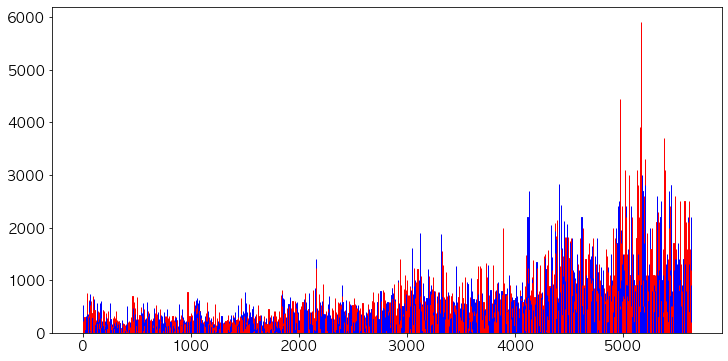

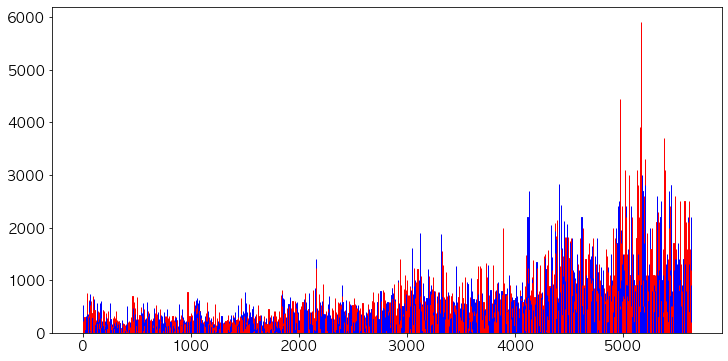

In [24]:
# 데이터의 계수만큼 0부터 1씩 증가된 값을 구한다.
x = range(len(a1))
bar_list = plt.bar(x, abs(a1.values))

# 색상 설정
for idx in x:
    if a1.values[idx] > 0:
        bar_list[idx].set_color('red')
    else:
        bar_list[idx].set_color('blue')

plt.show()